In [ ]:
from pathlib import Path
from tqdm import tqdm

import astropy.units as u
from astropy.time import Time, TimeDelta

import hvpy
from hvpy.datasource import DataSource

from sunpy.map import Map
from sunpy.net import Fido, attrs as a
from sunpy.time import parse_time

In [ ]:
time_event_start = Time('2024-03-23 00:00:00')
time_event_end   = Time('2024-03-23 04:00:00')
cadence = TimeDelta(5*u.min)

datetime_list = []
current_time = time_event_start
while current_time <= time_event_end:
    datetime_list.append(current_time.to_datetime())
    current_time += cadence
len(datetime_list)

49

In [ ]:
aia_root = Path('data/aia')
wavelengths = [94, 131, 171, 193, 211, 304, 335]
for wavelength in wavelengths:
    aia_path = aia_root / f'aia{wavelength}'
    aia_path.mkdir(parents=True, exist_ok=True)

In [ ]:
aia_ds = {
    94: DataSource.AIA_94.value,
    131: DataSource.AIA_131.value,
    171: DataSource.AIA_171.value,
    193: DataSource.AIA_193.value,
    211: DataSource.AIA_211.value,
    304: DataSource.AIA_304.value,
    335: DataSource.AIA_335.value,
}

In [ ]:
for dt in tqdm(datetime_list):
    for wavelength in wavelengths:
        hvpy.save_file(hvpy.getJP2Image(dt, aia_ds[wavelength]), filename=(aia_root / f'aia{wavelength}')/f"{parse_time(dt).isot}.jp2", overwrite=True)

100%|██████████| 49/49 [14:28<00:00, 17.72s/it]


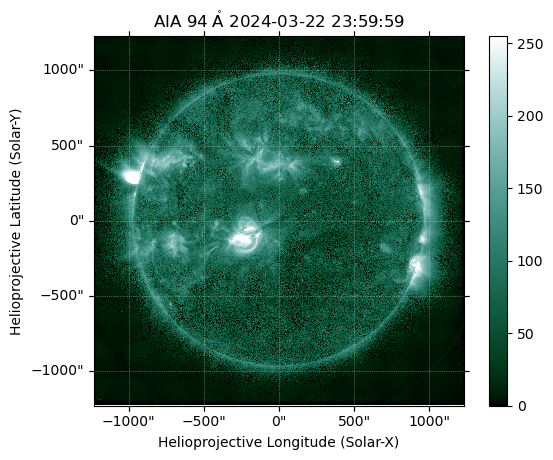

In [ ]:
f = sorted(Path(aia_root / 'aia94').glob('*.jp2'))
Map(f[0]).peek()